In [1]:
import pandas as pd

In [15]:
from konlpy.tag import *
twitter = Okt()

In [11]:
data1 = pd.read_csv('frozen1_preprocess.csv', encoding='cp949')
data2 = pd.read_csv('frozen2_preprocess.csv', encoding='cp949')

In [12]:
data1.head()

,review,score
0,수많은 세월동안 축적된 디즈니의 정수를 보여준 영화 겨울왕국의 성공은 디즈니와 함...,10
1,프로즌 한 장 이요,10
2,아 너무 감동적이라 눈물이 핑 하다가도 올라프때문에 키 하면서 웃게되네요,10
3,영상미 재미 노래 캐릭터 스토리 스토리가 ...,9
4,그래 전문 성우를쓰라니까 아이돌이나 유행어남발하는개그맨 어줍지않는배우써서...,10


In [13]:
data2.head()

,review,score
0,아기 안나가 너무 귀여워서 시작하자마자 울뻔했습니다,10
1,완벽한 결말입니다 안나 똑똑하고 솔직당당한거에 비해 주목을 못받는게 안타까웠었는데...,10
2,노래가 넘 좋았어요마지막에 엘사 넘 예뻐용,10
3,편보다는 조금 아쉽지만 엘사가 곡이나 불러줘서 좋았어요 노래보다는 아 아 아 아...,9
4,영상미에 놀라고 크리스토프때문에 웃다가 목소리 때문에 안타까움을 할아버지에게서 인...,9


- 겨울왕국1

In [56]:
word_tag1 = []
for i in data1['review']:
    morph1 = twitter.pos(i)
    word_tag1.append(morph1)

In [57]:
# 명사 추출을 통한 리뷰 파악
adj_list1 = []
for i in word_tag1:
    for word, tag in i:
        if tag == 'Noun':
            adj_list1.append(word)

In [62]:
# 명사의 빈도수 계산 & 상위 빈도 10위 까지 출력
from collections import Counter
counts1 = Counter(adj_list1)
print(counts1.most_common(30))

[('영화', 95), ('노래', 59), ('디즈니', 58), ('스토리', 47), ('정말', 38), ('엘사', 36), ('애니메이션', 34), ('최고', 34), ('진짜', 30), ('생각', 25), ('것', 24), ('사랑', 24), ('말', 24), ('점', 23), ('감동', 21), ('애니', 21), ('사람', 21), ('때', 21), ('애', 20), ('더', 20), ('이', 18), ('처음', 18), ('캐릭터', 17), ('보고', 17), ('겨울왕국', 16), ('번', 16), ('라푼젤', 15), ('영상', 15), ('더빙', 14), ('렛잇고', 14)]


- 겨울왕국2

In [59]:
word_tag2 = []
for i in data2['review']:
    morph2 = twitter.pos(i)
    word_tag2.append(morph2)

In [60]:
# 형용사 추출을 통한 리뷰 파악
adj_list2 = []
for i in word_tag2:
    for word, tag in i:
        if tag == 'Noun':
            adj_list2.append(word)

In [63]:
# 형용사의 빈도수 계산 & 상위 빈도 10위 까지 출력
from collections import Counter
counts2 = Counter(adj_list2)
print(counts2.most_common(30))

[('엘사', 127), ('겨울왕국', 62), ('편', 60), ('안나', 59), ('노래', 48), ('스토리', 47), ('때', 43), ('올라프', 42), ('것', 37), ('감동', 36), ('영화', 35), ('더', 28), ('도', 24), ('크리스토프', 20), ('아이', 20), ('정말', 19), ('진짜', 19), ('저', 18), ('생각', 17), ('장면', 17), ('보고', 17), ('영상', 17), ('느낌', 16), ('정령', 16), ('또', 15), ('최고', 15), ('사랑', 14), ('번', 14), ('이', 13), ('상미', 12)]


In [88]:
data1['score'].mean(), data2['score'].mean()

(7.586666666666667, 9.28888888888889)

In [87]:
data2['score'].mean()

9.28888888888889

In [81]:
data1_low = data1.loc[data1['score'] <= 6]

In [82]:
data1_high = data1.loc[data1['score'] > 6]

In [83]:
data2_low = data2.loc[data2['score'] <= 6]

In [84]:
data2_high = data2.loc[data2['score'] > 6]

In [85]:
print(len(data1_low), len(data1_high))
print(len(data2_low), len(data2_high))

75 225
15 255


In [91]:
word_tag1 = []
for i in data1_low['review']:
    morph1 = twitter.pos(i)
    word_tag1.append(morph1)
    
# 명사 추출을 통한 리뷰 파악
adj_list1 = []
for i in word_tag1:
    for word, tag in i:
        if tag == 'Noun':
            adj_list1.append(word)
            
# 명사의 빈도수 계산 & 상위 빈도 10위 까지 출력
from collections import Counter
counts1 = Counter(adj_list1)
print(counts1.most_common(10))

[('영화', 25), ('스토리', 25), ('노래', 24), ('점', 15), ('디즈니', 13), ('렛잇고', 8), ('평점', 8), ('라푼젤', 7), ('정도', 7), ('캐릭터', 6)]


In [92]:
word_tag1 = []
for i in data1_high['review']:
    morph1 = twitter.pos(i)
    word_tag1.append(morph1)
    
# 명사 추출을 통한 리뷰 파악
noun_list1 = []
for i in word_tag1:
    for word, tag in i:
        if tag == 'Noun':
            noun_list1.append(word)
            
# 명사의 빈도수 계산 & 상위 빈도 10위 까지 출력
from collections import Counter
counts1 = Counter(noun_list1)
print(counts1.most_common(10))

[('영화', 70), ('디즈니', 45), ('노래', 35), ('정말', 35), ('엘사', 35), ('애니메이션', 33), ('최고', 32), ('진짜', 26), ('사랑', 23), ('스토리', 22)]


In [97]:
word_tag2 = []
for i in data2_low['review']:
    morph2 = twitter.pos(i)
    word_tag2.append(morph2)
    
# 명사 추출을 통한 리뷰 파악
noun_list2 = []
for i in word_tag1:
    for word, tag in i:
        if tag == 'Noun':
            noun_list2.append(word)
            
# 명사의 빈도수 계산 & 상위 빈도 10위 까지 출력
from collections import Counter
counts2 = Counter(noun_list2)
print(counts2.most_common(10))

[('영화', 70), ('디즈니', 45), ('노래', 35), ('정말', 35), ('엘사', 35), ('애니메이션', 33), ('최고', 32), ('진짜', 26), ('사랑', 23), ('스토리', 22)]


In [98]:
word_tag2 = []
for i in data2_high['review']:
    morph2 = twitter.pos(i)
    word_tag2.append(morph2)
    
# 명사 추출을 통한 리뷰 파악
noun_list2 = []
for i in word_tag1:
    for word, tag in i:
        if tag == 'Noun':
            noun_list2.append(word)
            
# 명사의 빈도수 계산 & 상위 빈도 10위 까지 출력
from collections import Counter
counts2 = Counter(noun_list2)
print(counts2.most_common(10))

[('영화', 70), ('디즈니', 45), ('노래', 35), ('정말', 35), ('엘사', 35), ('애니메이션', 33), ('최고', 32), ('진짜', 26), ('사랑', 23), ('스토리', 22)]


In [93]:
# TOKENIZING
def make_corpus(text, corpus):
    for s in text.split('\n'):
        corpus.append(['/'.join(p) for p in twitter.pos(s)])
    return corpus

def make_corpus_rm_stopwords(text, corpus):
    for s in text.split('\n'):
        corpus.append(['/'.join(p) for p in twitter.pos(s) if p[1] != "Josa"]) 
    return corpus

In [144]:
# TOKENIZING
def make_corpus(text, corpus):
    for s in text.split('\n'):
        corpus.append(['/'.join(p) for p in twitter.pos(s)])
    return corpus

def make_corpus_rm_stopwords(text, corpus):
    for s in text.split('\n'):
        corpus.append(['/'.join(p) for p in twitter.pos(s) if p[1] != "Josa"]) 
    return corpus

corpus1_low = []
for i in data1_low['review']:
    # 토큰 모음집 만들기
    # make_corpus(i, corpus1)
    # 특수문자 제거
    make_corpus_rm_stopwords(i, corpus1_low)
    
corpus1_high = []
for i in data1_high['review']:
    # 토큰 모음집 만들기
    # make_corpus(i, corpus1)
    # 특수문자 제거
    make_corpus_rm_stopwords(i, corpus1_high)

In [95]:
corpus2_low = []
for i in data2_low['review']:
    # 토큰 모음집 만들기
    # make_corpus(i, corpus1)
    # 특수문자 제거
    make_corpus_rm_stopwords(i, corpus2_low)
    
corpus2_high = []
for i in data2_high['review']:
    # 토큰 모음집 만들기
    # make_corpus(i, corpus1)
    # 특수문자 제거
    make_corpus_rm_stopwords(i, corpus2_high)

In [147]:
Fast_Text_Model = FastText(corpus1_low, size=3, window=2, min_count=2, workers=1, iter=1000, sg=0)
Fast_Text_Model.wv.most_similar('최고/Noun', topn=10)

[('성/Noun', 0.9984533786773682),
 ('무슨/Noun', 0.998444139957428),
 ('성/Suffix', 0.997733473777771),
 ('정신/Noun', 0.9964184761047363),
 ('중/Suffix', 0.9960681796073914),
 ('많이/Adverb', 0.9938435554504395),
 ('식/Suffix', 0.9924851655960083),
 ('관객/Noun', 0.9890703558921814),
 ('전개/Noun', 0.9884139895439148),
 ('디즈니/Noun', 0.9878299832344055)]

In [107]:
Fast_Text_Model = FastText(corpus1_high, size=3, window=2, min_count=2, workers=1, iter=1000, sg=0)
Fast_Text_Model.wv.most_similar('좋은/Adjective', topn=10)

[('보여준/Verb', 0.9931619167327881),
 ('같습니다/Adjective', 0.989978015422821),
 ('좋았어요/Adjective', 0.989156186580658),
 ('멋지게/Adjective', 0.9877684116363525),
 ('있다/Adjective', 0.9875741600990295),
 ('사랑/Noun', 0.9858614802360535),
 ('뛰어난/Adjective', 0.9848148822784424),
 ('나머지/Noun', 0.9826844930648804),
 ('이야기/Noun', 0.9813811779022217),
 ('좀/Noun', 0.9812054634094238)]

In [108]:
Fast_Text_Model = FastText(corpus2_high, size=3, window=2, min_count=2, workers=1, iter=1000, sg=0)
Fast_Text_Model.wv.most_similar('좋은/Adjective', topn=10)

[('네/Determiner', 0.999935507774353),
 ('여자친구/Noun', 0.999919056892395),
 ('그래픽/Noun', 0.9995104074478149),
 ('더빙/Noun', 0.9994431734085083),
 ('대/Verb', 0.9992256760597229),
 ('남/Noun', 0.9989943504333496),
 ('로/Noun', 0.9983292818069458),
 ('좋았습니다/Adjective', 0.9983160495758057),
 ('분/Noun', 0.997758686542511),
 ('번/Noun', 0.9971999526023865)]

In [142]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 깨지는 문제 대처
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=1213)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

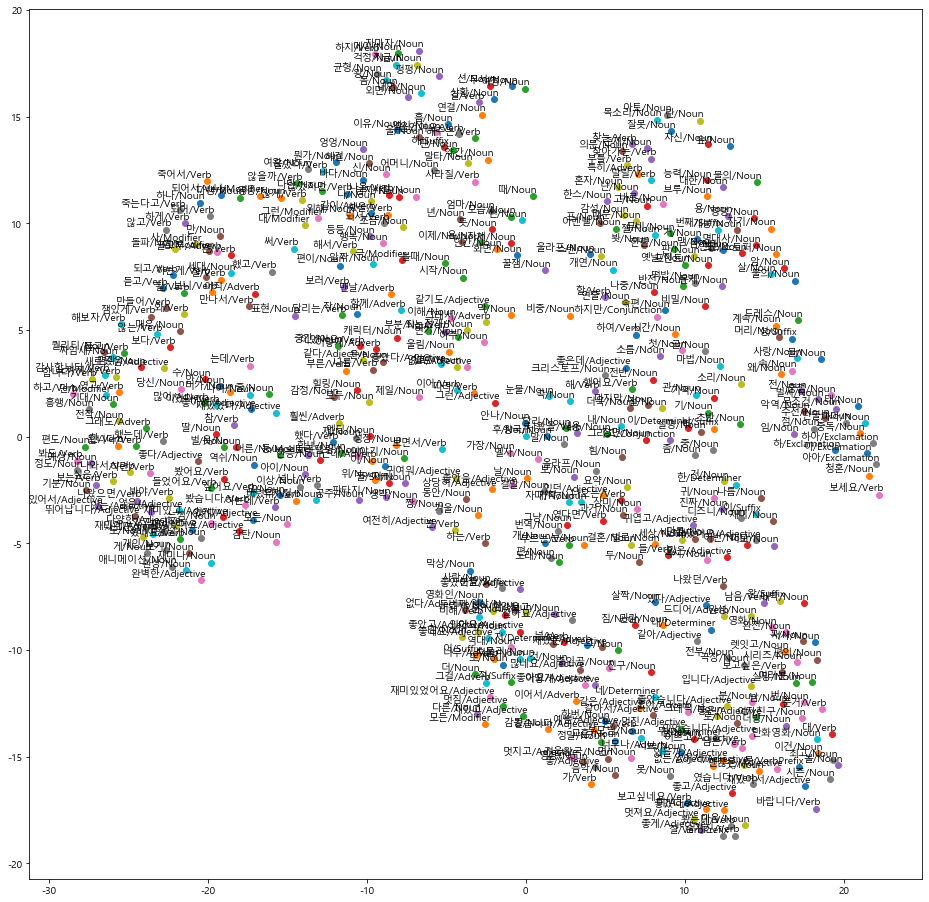

In [143]:
tsne_plot(Fast_Text_Model)